# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [1]:
#Importando bibliotecas

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score

In [2]:
#importando a base de dados

tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [3]:
#Criando a regressao de tip_pct por net_bill

reg1 = smf.ols('tip_pct ~ net_bill',data = tips[tips['tip_pct']<.5]).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     56.10
Date:                Thu, 23 May 2024   Prob (F-statistic):           1.31e-12
Time:                        18:43:12   Log-Likelihood:                 331.48
No. Observations:                 242   AIC:                            -659.0
Df Residuals:                     240   BIC:                            -652.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2538      0.009     27.252      0.000       0.235       0.272
net_bill      -0.0037      0.000     -7.490      0.000      -0.005      -0.003
==============================================================================
Omnibus:                       25.646   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.523
Skew:                           0.764   Prob(JB):                     1.43e-07
Kurtosis:                       3.889   Cond. No.                         43.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
tips['res'] = reg1.resid

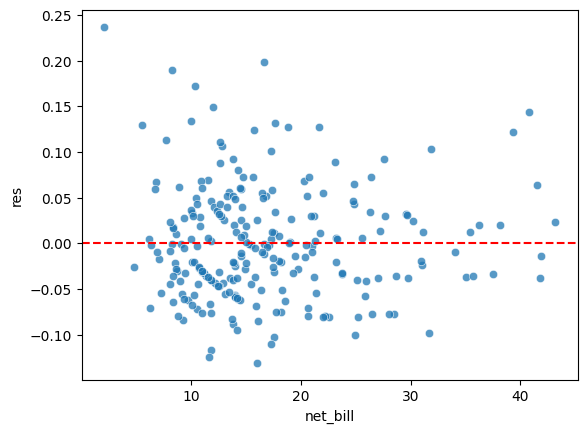

In [5]:
sns.scatterplot(x = 'net_bill', y = 'res', data = tips[tips['tip_pct']<.5], alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

In [6]:
#Ajustando o modelo para log(net_bill)
reg2 = smf.ols('tip_pct ~ np.log(net_bill +.1)', data = tips[tips['tip_pct']<.5]).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     67.94
Date:                Thu, 23 May 2024   Prob (F-statistic):           1.11e-14
Time:                        18:43:23   Log-Likelihood:                 336.23
No. Observations:                 242   AIC:                            -668.5
Df Residuals:                     240   BIC:                            -661.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.3836      0.024     16.168      0.000       0.337       0.430
np.log(net_bill + .1)    -0.0706      0.009     -8.242      0.000      -0.088      -0.054
==============================================================================
Omnibus:                       15.746   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.949
Skew:                           0.632   Prob(JB):                     0.000209
Kurtosis:                       3.284   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
tips['res_log'] = reg2.resid

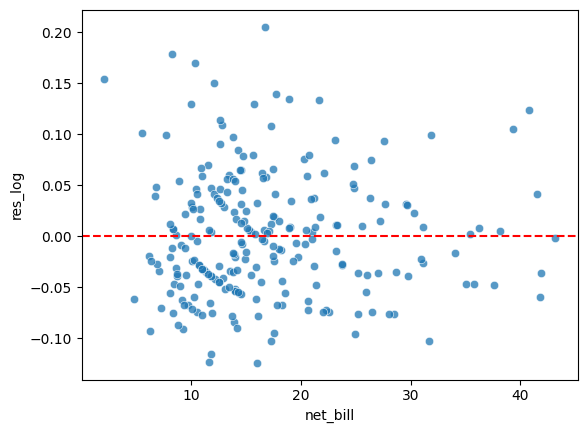

In [8]:
sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips[tips['tip_pct']<.5], alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

In [9]:
#Ajustando o modelo para o polinomio de segundo grau de net_bill

reg3 = smf.ols('tip_pct ~ np.power(net_bill,2)', data = tips[tips['tip_pct']<.5]).fit()
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     43.61
Date:                Thu, 23 May 2024   Prob (F-statistic):           2.56e-10
Time:                        18:43:44   Log-Likelihood:                 326.27
No. Observations:                 242   AIC:                            -648.5
Df Residuals:                     240   BIC:                            -641.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.2171      0.006     38.106      0.000       0.206       0.228
np.power(net_bill, 2) -7.577e-05   1.15e-05     -6.603      0.000   -9.84e-05   -5.32e-05
==============================================================================
Omnibus:                       31.950   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.955
Skew:                           0.826   Prob(JB):                     1.73e-10
Kurtosis:                       4.315   Cond. No.                         698.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
tips['res_pow'] = reg3.resid

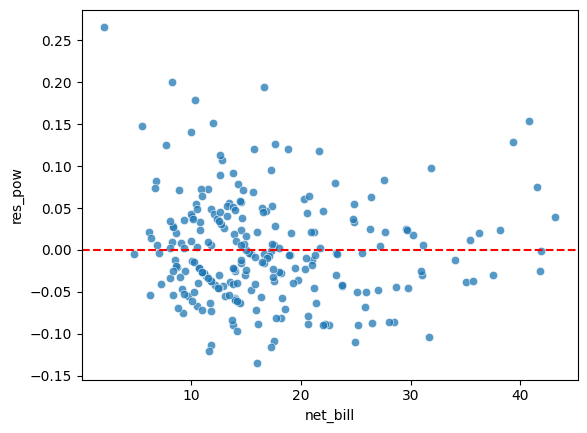

In [12]:
#plot do grafico

sns.scatterplot(x = 'net_bill', y = 'res_pow', data = tips[tips['tip_pct']<.5], alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

In [13]:
tips['log_y'] = np.log(tips['tip_pct']+.1)

In [15]:
tips['log_x'] = np.log(tips['net_bill']+.1)

In [14]:
reg4 = smf.ols('np.log(tip_pct+.1) ~ net_bill', data = tips[tips['tip_pct']<.5]).fit()
reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(tip_pct + .1)   R-squared:                       0.214
Model:                              OLS   Adj. R-squared:                  0.211
Method:                   Least Squares   F-statistic:                     65.35
Date:                  Thu, 23 May 2024   Prob (F-statistic):           3.09e-14
Time:                          18:43:59   Log-Likelihood:                 36.609
No. Observations:                   242   AIC:                            -69.22
Df Residuals:                       240   BIC:                            -62.24
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0323      0.032    -32.772      0.000      -1.094      -0.970
net_bill      -0.0136      0.002     -8.084      0.000      -0.017      -0.010
==============================================================================
Omnibus:                        0.268   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.875   Jarque-Bera (JB):                0.269
Skew:                           0.079   Prob(JB):                        0.874
Kurtosis:                       2.955   Cond. No.                         43.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
tips['res_y_log'] = reg4.resid

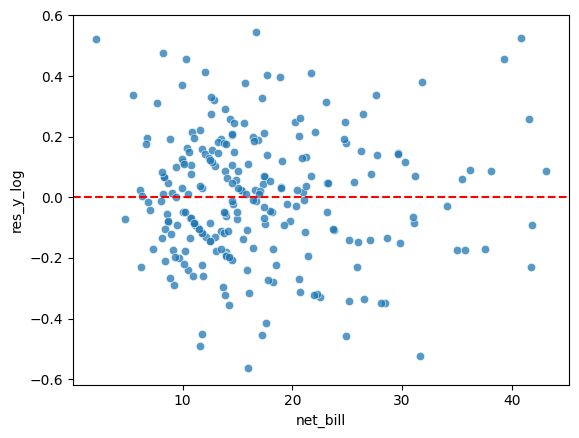

In [16]:
#plot do grafico

sns.scatterplot(x = 'net_bill', y = 'res_y_log', data = tips[tips['tip_pct']<.5], alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [17]:
tips['pred'] = reg4.fittedvalues
r = tips[['pred','log_y']].corr().iloc[0,1]

In [52]:
r**2

0.21400738759584767

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

In [18]:
#Ajustando o modelo para log(tip_pct) x log(net_bill)
reg5 = smf.ols('np.log(tip_pct+.1) ~ np.log(net_bill +.1)', data = tips[tips['tip_pct']<.5]).fit()
reg5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(tip_pct + .1)   R-squared:                       0.228
Model:                              OLS   Adj. R-squared:                  0.225
Method:                   Least Squares   F-statistic:                     70.94
Date:                  Thu, 23 May 2024   Prob (F-statistic):           3.39e-15
Time:                          18:44:24   Log-Likelihood:                 38.806
No. Observations:                   242   AIC:                            -73.61
Df Residuals:                       240   BIC:                            -66.63
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.5889      0.081     -7.261      0.000      -0.749      -0.429
np.log(net_bill + .1)    -0.2467      0.029     -8.423      0.000      -0.304      -0.189
==============================================================================
Omnibus:                        0.372   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.830   Jarque-Bera (JB):                0.514
Skew:                           0.036   Prob(JB):                        0.773
Kurtosis:                       2.786   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
tips['res_y_x_log'] = reg5.resid

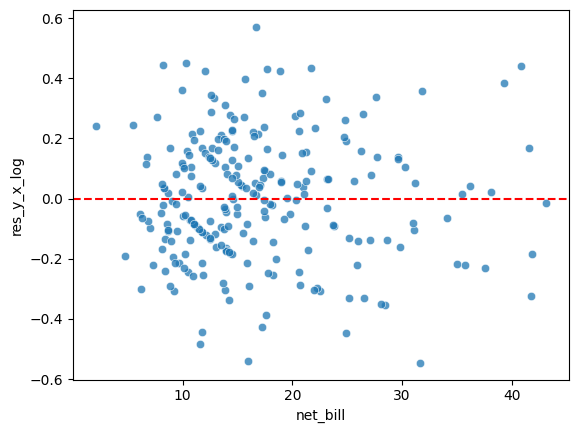

In [20]:
#plot do grafico

sns.scatterplot(x = 'net_bill', y = 'res_y_x_log', data = tips[tips['tip_pct']<.5], alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [29]:
tips['pred_y'] = reg5.fittedvalues
r = tips[['pred_y','log_y']].corr().iloc[0,1]

In [22]:
r**2

0.22815047806213307

###  6. qual modelo resultou no melhor ajuste?

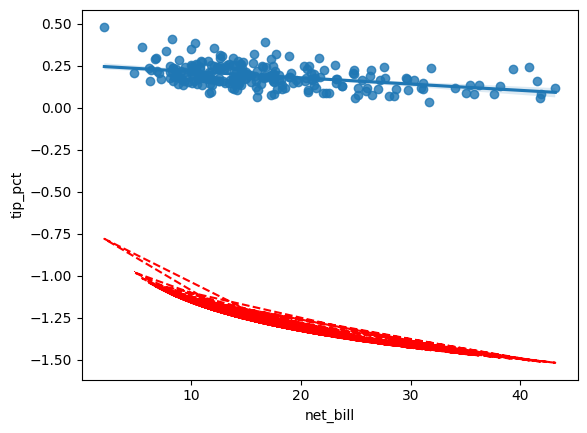

In [30]:
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips[tips['tip_pct']<.5])
plt.plot(tips['net_bill'], tips['pred_y'], 'r,--')

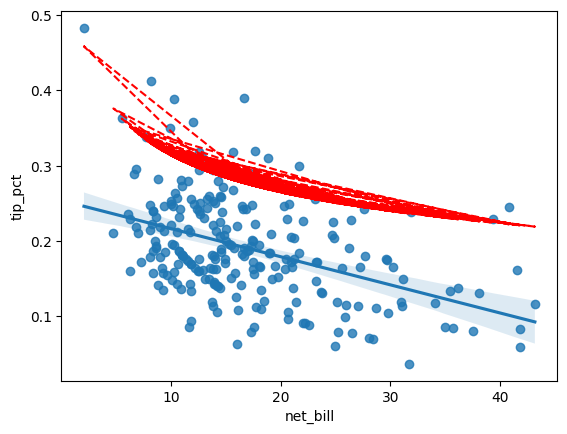

In [31]:
plt.close()
tips['pred_y'] = np.exp(reg5.fittedvalues)
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips[tips['tip_pct']<.5])
plt.plot(tips['net_bill'], tips['pred_y'], 'r,--')

In [ ]:
#O que resultou um melhor ajuste foi o modelo no log do tip_pct em função do log de net_bill.